# Final model comparison and summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
import pickle
from helpers import target_feature, get_without_nan_cols, rename_cols_for_lgbm, random_seed

np.random.seed(random_seed)

In [2]:
def plot_jointplot(y_true, y_predict):
    jointplot = pd.DataFrame({
        'y_true': y_true,
        'y_predict': y_predict
    })

    plt.figure(figsize=(10, 5))
    jplot = sns.jointplot(jointplot, x='y_true', y='y_predict', kind='reg', truncate=False, joint_kws={'color':'b', 'scatter_kws': { 's': 5 }})

    regline = jplot.ax_joint.get_lines()[0]
    regline.set_color('red')
    regline.set_zorder(5)

In [3]:
def plot_score_comparison(scores, score_name):
    ax = scores.plot(kind='bar', figsize=(10, 5), title=f"{score_name} comparison on test set", width=0.2, color='b')

    plt.tick_params(
        axis='x',
        which='both',
        bottom=True,
        top=False,
        labelbottom=True) 
    ax.set_xticklabels(scores.index, rotation=0, fontsize=12)
    ax.set_xlabel("Models", fontsize=13)
    ax.plot()

In [4]:
plot_jointplots = True

In [5]:
train = pd.read_csv('../data/post_fs_train.csv', index_col=0)
test = pd.read_csv('../data/post_fs_test.csv', index_col=0)

In [6]:
y_train = train[target_feature].values
x_train = train.drop(target_feature, axis=1)

y_test = test[target_feature].values
x_test = test.drop(target_feature, axis=1)

In [7]:
without_nan_cols = get_without_nan_cols(x_train.columns.to_list())

In [8]:
final_scores = pd.DataFrame(columns=['RMSE', 'R2'])

### OLS

In [9]:
with open('../models/ols.pkl', 'rb') as f:
    ols_model = pickle.load(f)

y_predict = ols_model.predict(x_test[without_nan_cols].values)

final_scores.loc['OLS'] = (mean_squared_error(y_test, y_predict)**0.5, r2_score(y_test, y_predict))
final_scores

,RMSE,R2
OLS,0.584191,0.980191


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

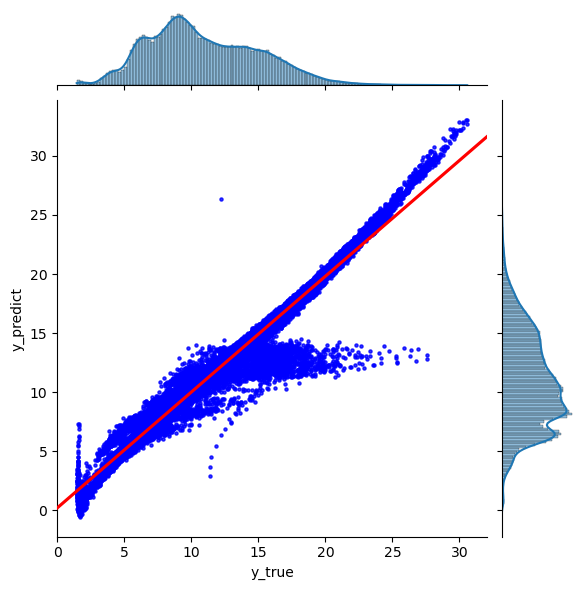

In [10]:
if plot_jointplots:
    plot_jointplot(y_test, y_predict)

### Ridge regression

In [11]:
with open('../models/ridge.pkl', 'rb') as f:
    ridge_model = pickle.load(f)

y_predict = ridge_model.predict(x_test.values)

final_scores.loc['Ridge'] = (mean_squared_error(y_test, y_predict)**0.5, r2_score(y_test, y_predict))
final_scores

,RMSE,R2
OLS,0.584191,0.980191
Ridge,0.583254,0.980254


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

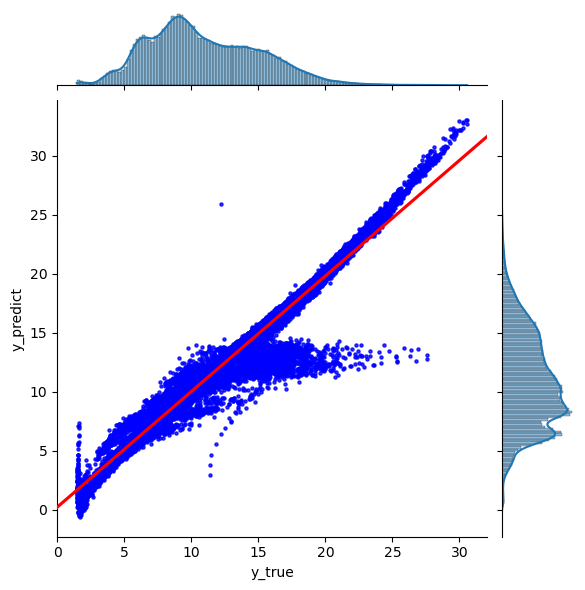

In [12]:
if plot_jointplots:
    plot_jointplot(y_test, y_predict)

### Lasso regression

In [13]:
with open('../models/lasso.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

y_predict = lasso_model.predict(x_test.values)

final_scores.loc['LASSO'] = (mean_squared_error(y_test, y_predict)**0.5, r2_score(y_test, y_predict))
final_scores

,RMSE,R2
OLS,0.584191,0.980191
Ridge,0.583254,0.980254
LASSO,1.180957,0.919048


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

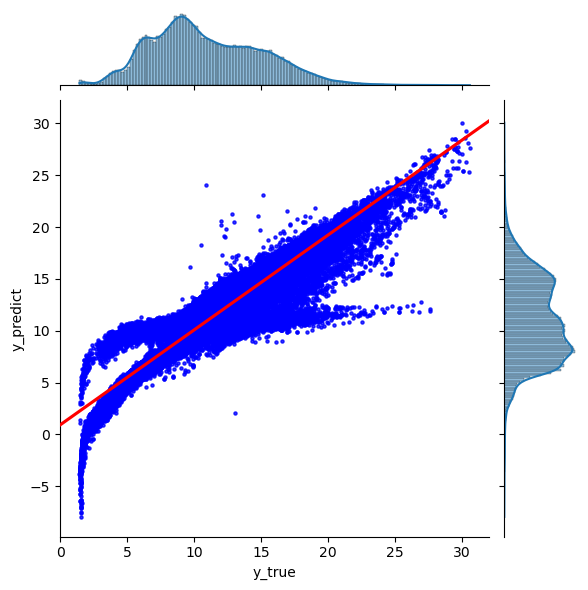

In [14]:
if plot_jointplots:
    plot_jointplot(y_test, y_predict)

### Regression tree

In [15]:
continuous_cols = x_test.select_dtypes(np.float64).columns.to_list()

In [16]:
with open('../models/reg_tree.pkl', 'rb') as f:
    reg_tree_model = pickle.load(f)

y_predict = reg_tree_model.predict(x_test[continuous_cols].values)

final_scores.loc['Reg_Tree'] = (mean_squared_error(y_test, y_predict)**0.5, r2_score(y_test, y_predict))
final_scores

,RMSE,R2
OLS,0.584191,0.980191
Ridge,0.583254,0.980254
LASSO,1.180957,0.919048
Reg_Tree,0.400834,0.990674


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

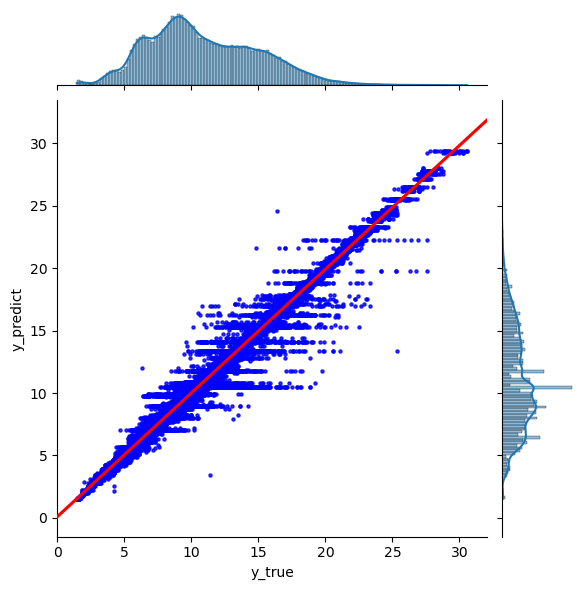

In [17]:
if plot_jointplots:
    plot_jointplot(y_test, y_predict)

### LGBM

In [18]:
x_test_lgbm = rename_cols_for_lgbm(x_test)

In [19]:
with open('../models/LGBM.pkl', 'rb') as f:
    lgbm_model = pickle.load(f)

y_predict = lgbm_model.predict(x_test_lgbm.values)

final_scores.loc['LGBM'] = (mean_squared_error(y_test, y_predict)**0.5, r2_score(y_test, y_predict))
final_scores

,RMSE,R2
OLS,0.584191,0.980191
Ridge,0.583254,0.980254
LASSO,1.180957,0.919048
Reg_Tree,0.400834,0.990674
LGBM,0.239463,0.996672


c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\shele\anaconda3\envs\calcofi\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

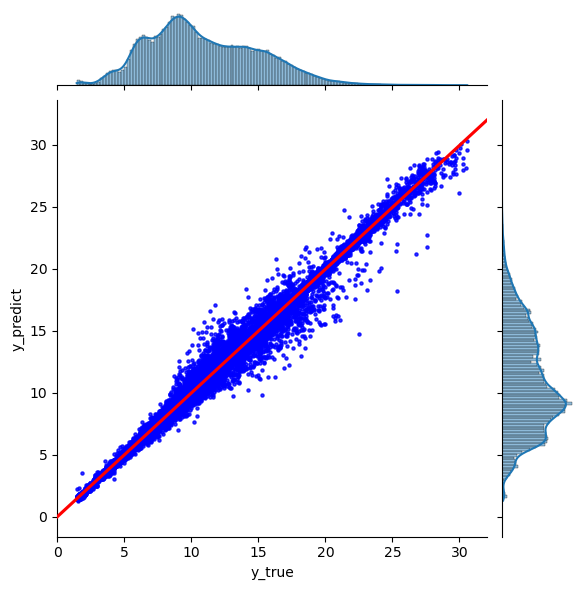

In [20]:
if plot_jointplots:
    plot_jointplot(y_test, y_predict)

## Final comparison

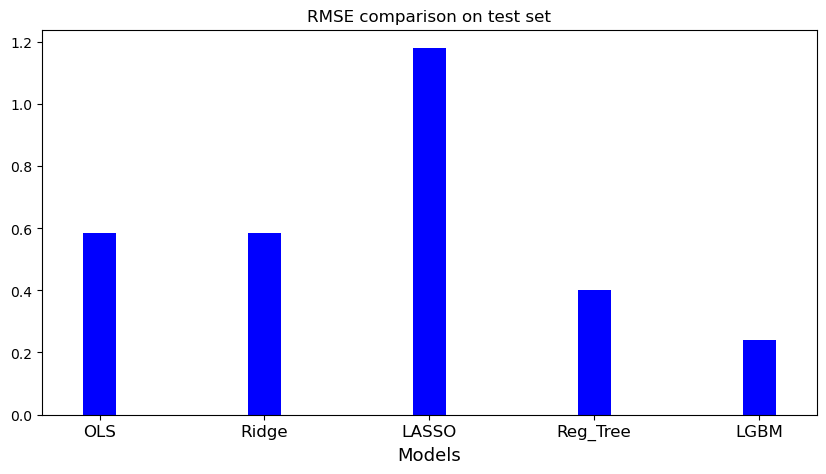

In [21]:
plot_score_comparison(final_scores['RMSE'], 'RMSE')

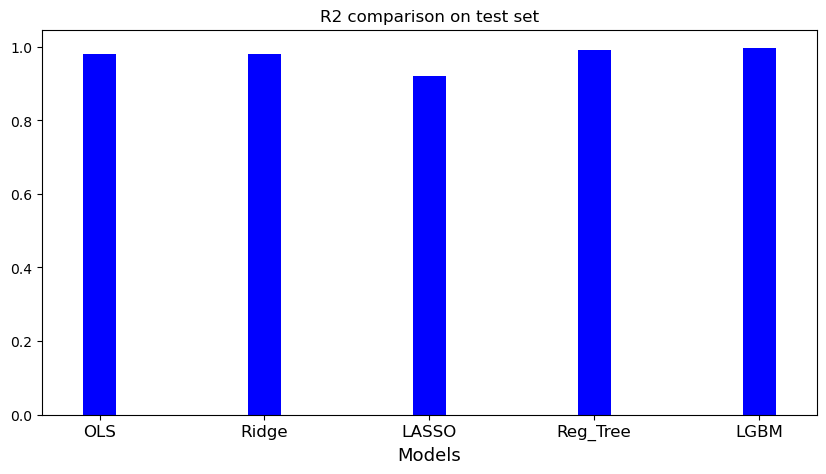

In [22]:
plot_score_comparison(final_scores['R2'], 'R2')

### Final conclusions

The winner is LGBM model.

Based on final scores we see that: 
 * OLS performed very good by itself, so it is rather hard to beat it
 * Ridge regression performed on the same level as OLS, but, as we see on the plots, its predictions are plotted in a way resembling the original features.
 * LASSO performed the worst
 * Surprisingly, a simple decision tree regressor provided better performance than OLS
 * LGBM is the best model, but it's cross-validation takes a lot of time, therefore a decision tree regressor might be a better choice for this problem.

Overall, we shouldn be aware when evaluating the performances of all the models, because the region of measurements (US West Coast - California) has rather homogenuous form the perspective of sea currents and climate (it is also relativelly small region). Evaluating models for data containing water samples from different parts of the world would be probably more interesting.